![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F12053762%2F3c94ab343f0e44a43b6f3563a7116373%2FXUGEPVQJJMI6LBP3WAQRGYECEI.jpg?generation=1695786557088668&alt=media)

<div style="background-color: #87CEFA; padding: 20px; margin: 10px; border-radius: 10px; box-shadow: 5px 5px 5px #888888;">
  <h1 style="color: #000; font-size: 20px;">Table of Contents</h1>
  <ul style="list-style-type: disc; padding-left: 0; font-size: 16px;">
    <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">1. Overview</a></li>
    <li style="margin-left: 15px;"><a href="#section-2" style="color: #000; text-decoration: none;">2. Import Libraries</a></li>
    <li style="margin-left: 15px;"><a href="#section-3" style="color: #000; text-decoration: none;">3. Preprocessing</a>
        <br>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>3.1 Get the pathes</li>
        <li>3.2 Load the Images with a generator and Data Augmentation</li>
        <li>3.3 Display images</li>
        <li>3.4 EarlyStopping</li>
        <li>3.5 Reduction learning_rate</li>
      </ul>
    </li>
      <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">4. Exponential Decay</a></li>
    <li style="margin-left: 15px;"><a href="#section-4" style="color: #000; text-decoration: none;">5. Transfer Learning</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>5.1 Get the weights from DenseNet121</li>
        <li>5.2 Freeze the layers of DenseNet121</li>
      </ul>
    </li>
    <li style="margin-left: 15px;"><a href="#section-5" style="color: #000; text-decoration: none;">6. Build the Model</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>6.1 Build the Model </li>
        <li>6.2 Set the optimizer</li>
        <li>6.3 Training the model </li>
      </ul>
    </li>
      <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">7. Evaluate the model</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>7.1 Evaluate the validationr</li>
        <li>7.2 Accuracy graph</li>
        <li>7.3 Loss graph</li>
        <li>7.4 Confusion Matrix</li>
        <li>7.5 Generate predictions for the test data</li>    
      </ul>
      </li>
    <li style="margin-left: 15px;"><a href="#section-6" style="color: #000; text-decoration: none;">8. Conclusion</a></li>
  </ul>
</div>


<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Overview
</h1>

# 1. Overview




In this notebook we will make a **classifier** for **dogs-&-cats** datasets according to the following steps:

- We will pre-process the data using **Generator** way, and we will explain why we used it
- Then we will explain both ideas **Early_stopping** and **Reduction_learning_rate** and why we used them
- After that, we explained in detail the importance of the idea of **Exponential Decay** and how to implement it
- Then we chose **DeseNet-121-v2** to train the model on it and showed the difference between it and other transfer learning model
- Finally, we built the neural network, trained it, and checked its accuracy

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Import Libraries
</h1>

# 2. Import Libraries

In [ ]:
!pip install imagehash
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import imagehash
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.applications import DenseNet121

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Preprocessing
</h1>

# 3.Preprocessing

### 3.1 Get the pathes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/My Drive/dataset/training_set'
test_path = '/content/drive/My Drive/dataset/test_set'

### 3.2 Load the Images with a generator and Data Augmentation


 ### Why you should use (flow_from_directory) for Visualize Images ?


 Using `flow_from_directory` in conjunction with `ImageDataGenerator` offers several advantages when working with image datasets in deep learning tasks. Here are some reasons why you might want to use `flow_from_directory`:

1. **Directory Structure and Labels**: If your data is organized in a directory structure where each subdirectory corresponds to a class, `flow_from_directory` can automatically assign labels to images based on the directory names. This eliminates the need for you to manually assign labels to each image.

2. **Data Augmentation**: `ImageDataGenerator` allows you to apply data augmentation techniques such as rotation, flipping, and scaling to your images on-the-fly while they are being loaded. This helps improve the generalization of your model and prevents overfitting.

3. **Batch Loading**: Loading images in batches helps manage memory efficiently, **especially when working with large datasets that may not fit into memory**. `flow_from_directory`loads images in batches, allowing you to train your model with minimal memory usage.

4. **Preprocessing**: `ImageDataGenerator` can apply preprocessing steps such as rescaling pixel values and standardizing input data on-the-fly. This ensures that your input data is properly preprocessed before being fed into the model.

5. **Easy Integration with Keras Models**: The data generator returned by `flow_from_directory` can be directly used as input for Keras' `fit` and `evaluate` methods. This streamlines the training and evaluation process, making it easier to manage data loading and preprocessing.

6. **Shuffling**: By setting the `shuffle` parameter to `True` in `flow_from_directory`, you can shuffle the order of images within each epoch, preventing the model from memorizing the order of training examples.

7. **Efficient Coding**: Using `flow_from_directory` reduces the amount of manual coding required to load and preprocess images, freeing you to focus more on building and training your models.

In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,                # Rescale pixel values to [0, 1]
    rotation_range=20,              # Random rotation within 20 degrees
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations
)

In [ ]:
size_images = 200
batch_size = 64

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,                     # Path to the training data
    target_size=(size_images, size_images),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)

Found 8010 images belonging to 2 classes.


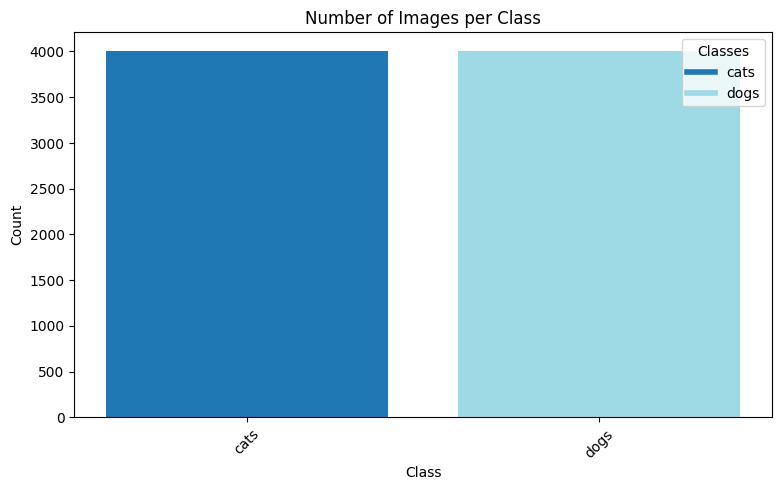

In [ ]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(9, 5))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

In [ ]:
# data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]

In [ ]:
# Create a generator for testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(size_images, size_images),
    batch_size = batch_size,
    class_mode='categorical')

Found 2000 images belonging to 2 classes.


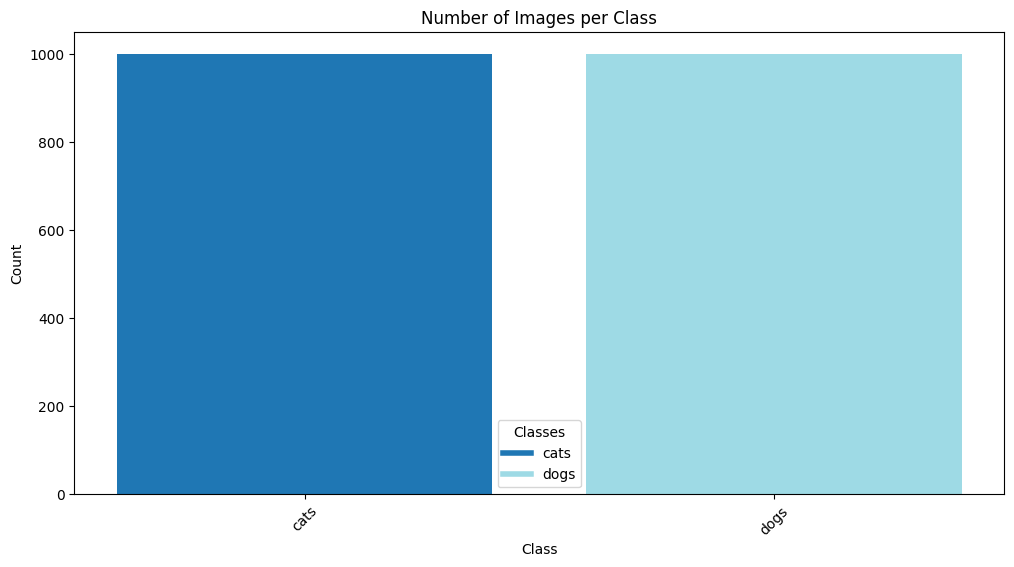

In [ ]:
# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(test_generator)):
    batch_data, batch_labels = test_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

### 3.3 Display Images

In [ ]:
def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),36))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

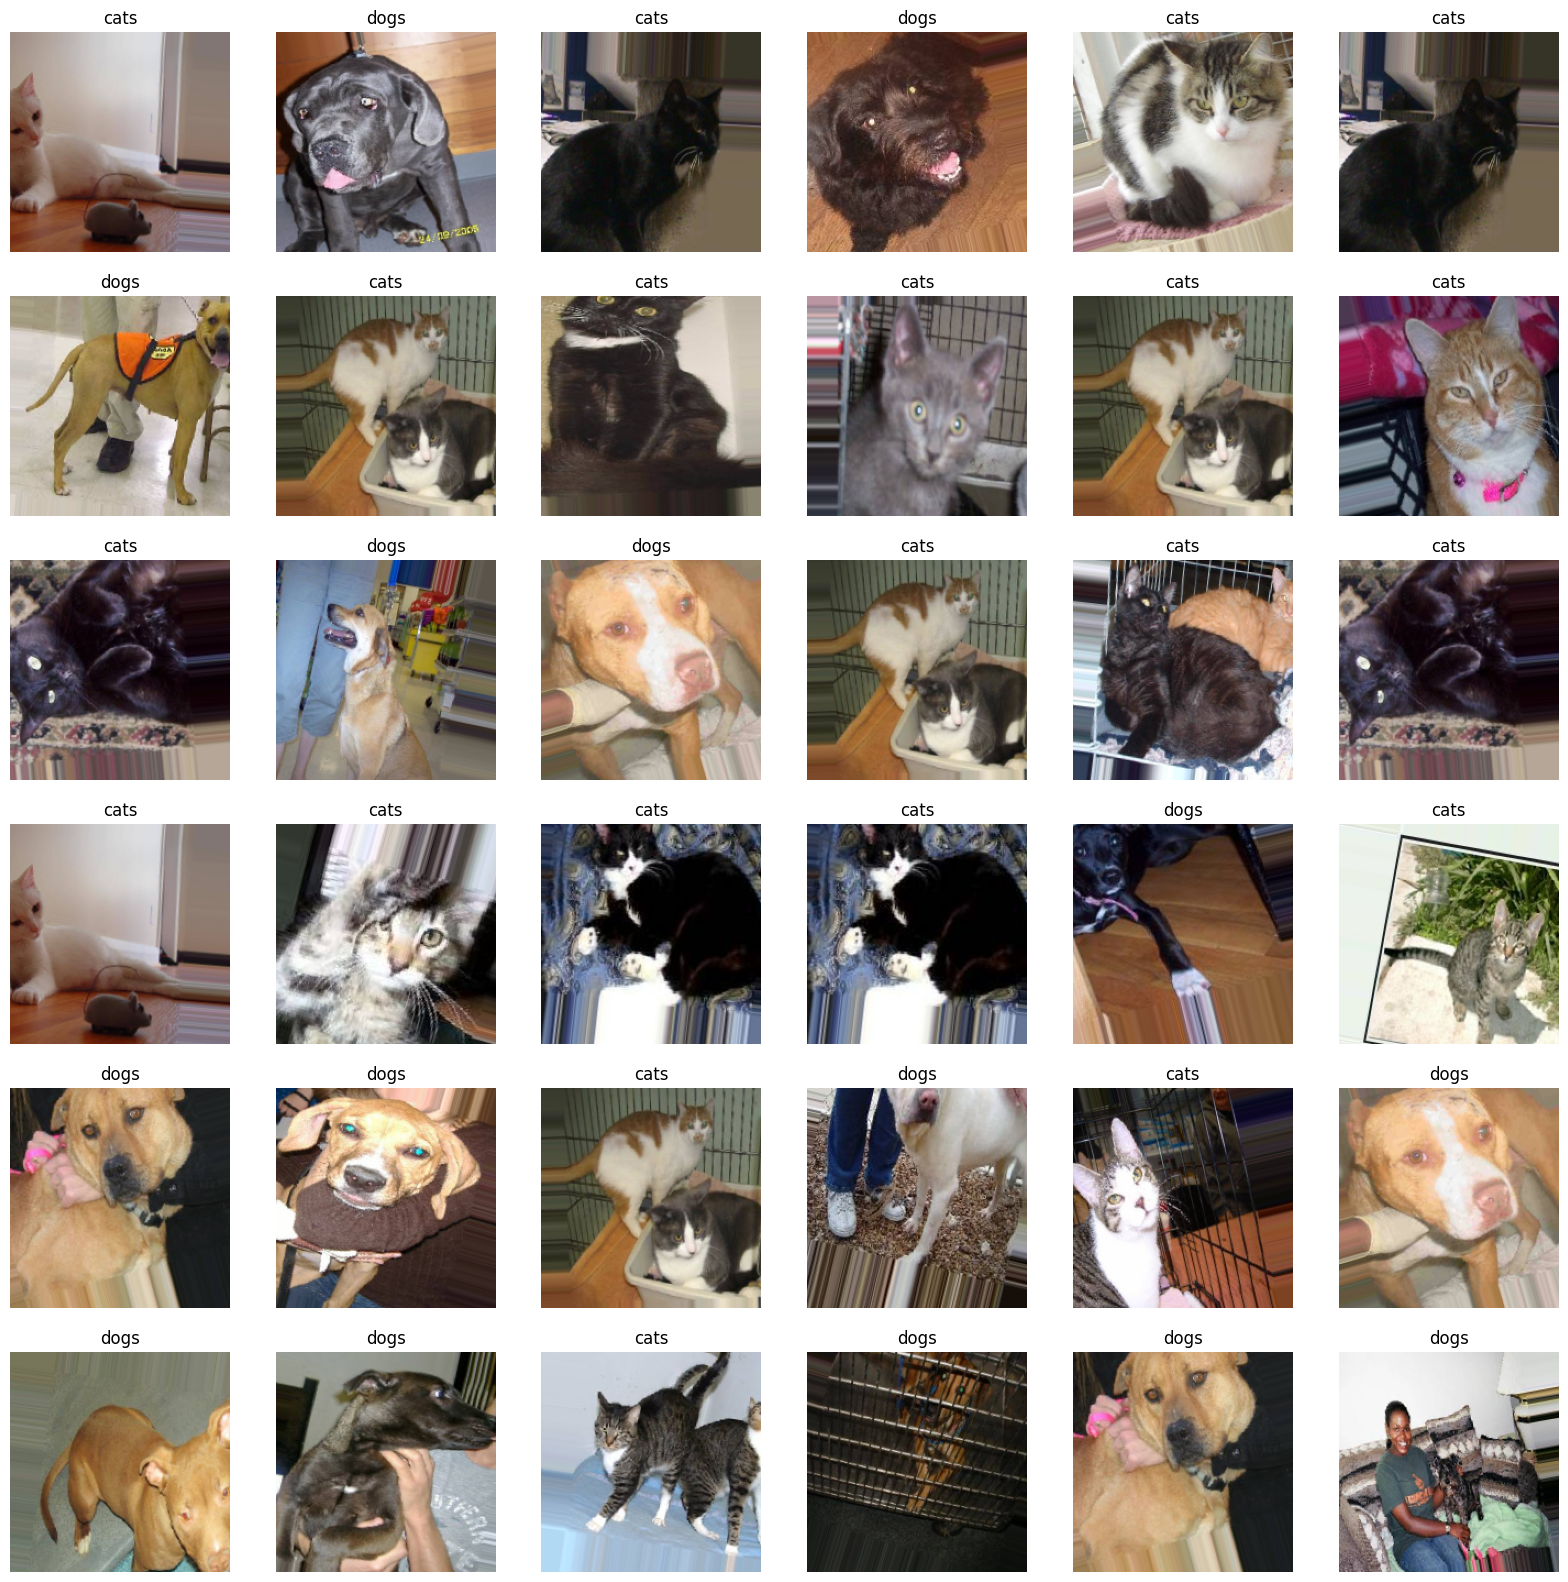

In [ ]:
Show_Images(train_generator)

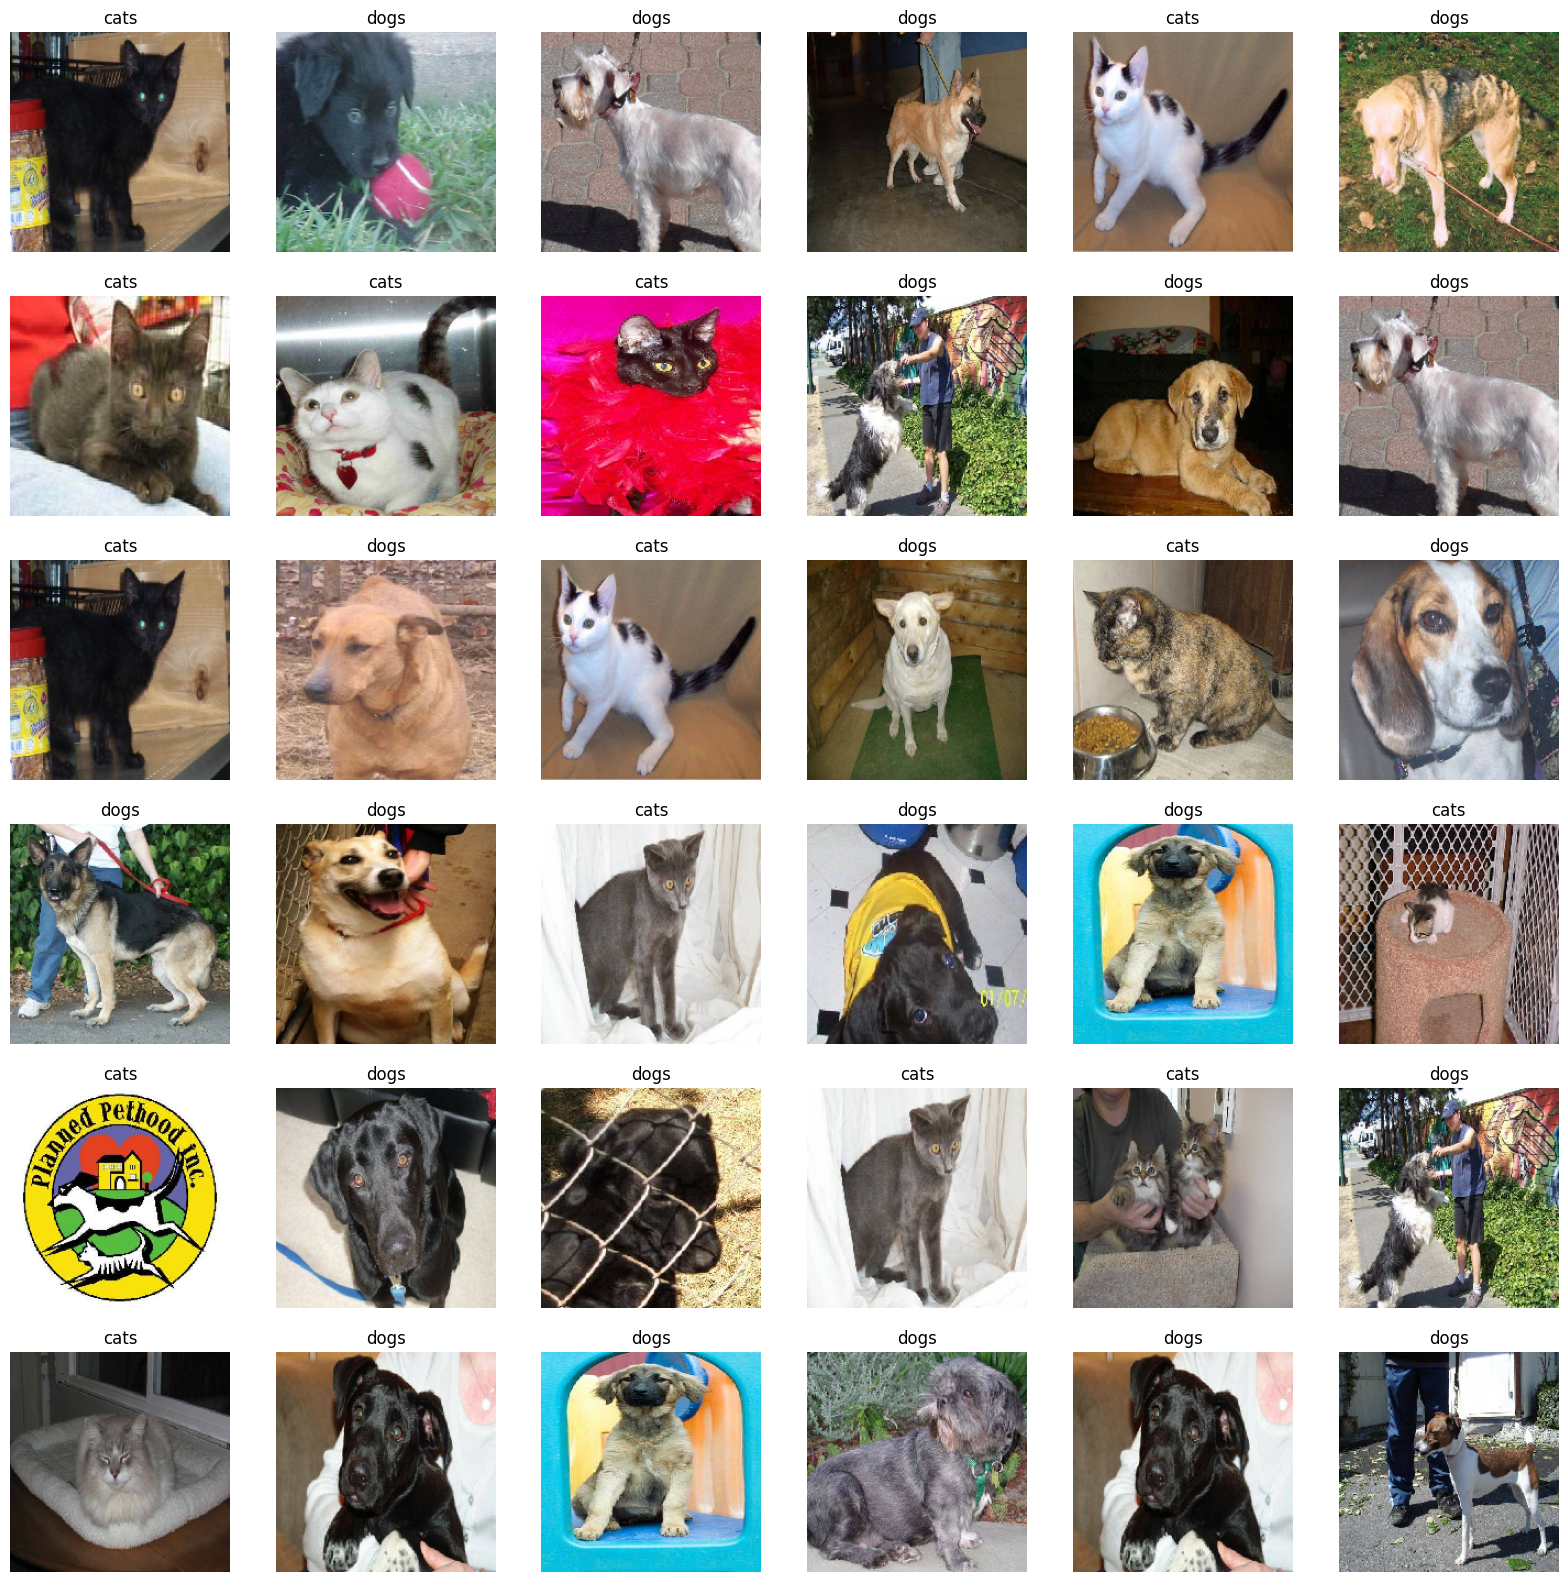

In [ ]:
Show_Images(test_generator)

### 3.4 EarlyStopping
***Early stopping*** works by monitoring the performance of the model on a validation set during training. The validation set is a set of data that is held out from the training data and is not used to train the model. The model's performance on the validation set is **used to determine if the model is overfitting.**

If the model's performance on the validation set starts to plateau or decrease, then the training is stopped early. **This prevents the model from continuing to fit the training data too closely**, which can lead to overfitting.

💡 Here is a simple analogy to help you understand early stopping:

Imagine you are trying to learn how to play a new game. You start by playing the game against a computer opponent. As you play, you get better and better at the game. However, at some point, you start to plateau. You are not getting any better at the game, even though you are still playing against the same computer opponent.




In [ ]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

### 3.5 Reduction learning_rate

Reduction of the learning rate means decreasing the step size (learning rate) during training to help a machine learning model converge more effectively and avoid convergence issues.

In [ ]:
# Configure the learning rate reduction callback
learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_acc',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
)

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Exponential Decay
</h1>

# 4.Exponential Decay

📕 ***ExponentialDecay*** is a learning rate schedule that reduces the learning rate exponentially over time. This is done by multiplying the learning rate by a factor of less than 1, such as 0.5 or 0.9, after a certain number of epochs or training steps.

- The formula for exponential decay can be expressed as:

##  ***New Value = Initial Value × Decay Rate ^(Step Count)***


 For example, if you start with an initial learning rate of `0.1` and use an exponential decay rate of `0.9`, the learning rate might evolve as follows:

- After 1 step: \(0.1 \times 0.9^1 = 0.09\)
- After 2 steps: \(0.1 \times 0.9^2 = 0.081\)
- After 3 steps: \(0.1 \times 0.9^3 = 0.0729\)
- ...

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F12053762%2F33e63b666e59d83dc3f11e46f4d04430%2F640px-Plot-exponential-decay.svg.png?generation=1695445033268258&alt=media)

📘 `ExponentialDecay` is a common and effective learning rate schedule **for image classification**. It is often used in conjunction with other techniques, such as momentum and weight decay, **to improve the performance of deep learning models.**

✔️ Here are some of the **benefits** of using `ExponentialDecay`:

* It can help to **prevent overfitting** by reducing the learning rate over time.
* It can help the model to converge **more quickly and smoothly.**
* It can help to **improve the fine-tuning** performance of the model.

❌ However, there are also some **potential drawbacks** to using` ExponentialDecay`:

* It can be **difficult to choose the right initial learning rate and decay rate.**
* It can be **slow to converge in the early stages of training.**

💡 ***Overall***, `ExponentialDecay` is a powerful learning rate schedule that **can be used to improve the performance of deep learning models**. However, **it is important to carefully consider the benefits and drawbacks before using it.**

In [ ]:
from tensorflow.keras import optimizers

# Create a learning rate schedule using Exponential Decay
learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.5,              # Rate at which the learning rate decreases
)

# learning_rate = initial_learning_rate * decay_rate ^ (global_step / decay_steps)


In [ ]:
from keras.callbacks import LearningRateScheduler

# Create a Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(learning_rate_schedule)
callback=[ lr_callback , learning_rate_reduce ,early_stopping ]

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Transfer Learning
</h1>

# 5.Transfer Learning

#### We have chosen DeseNet-121v2 for training our model
#### Here we have a definition and some reasons why we have chosen DeseNet-121v2
DenseNet-121v2 is a specific variant of the DenseNet architecture, and when comparing it to other popular transfer learning models like ResNet, Inception, and VGG, here are three key differences:

1. **Dense Connectivity**: DenseNet is characterized by dense connectivity between layers. In a DenseNet, each layer receives input from all previous layers. This is in contrast to models like ResNet, where layers are connected by skip connections, but not every layer is directly connected to every other layer. The dense connectivity in DenseNet promotes feature reuse and helps gradients flow more efficiently during training.

2. **Parameter Efficiency**: DenseNet is more parameter-efficient compared to some other architectures like VGG or traditional deep networks. This is because of the shared feature maps and feature concatenation in each layer. The dense connectivity allows you to achieve similar or better performance with fewer parameters, which can be advantageous in scenarios with limited computational resources.

3. **Gradient Flow**: DenseNet's architecture helps in maintaining a strong gradient flow during training. With each layer directly connected to every other layer, the gradients have a clear path to propagate through the network. This can lead to faster convergence during training and makes it easier to train very deep networks.

These differences make DenseNet-121v2 a unique and effective choice for various computer vision tasks, especially when you have limited data or computational resources. However, the choice of which transfer learning model to use ultimately depends on the specific requirements of your task and the trade-offs you are willing to make in terms of computational complexity and model size.

### 5.1 Get the weights from DenseNet121

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(size_images, size_images, 3))

29084464/29084464 [==============================] - 0s 0us/step


### 5.2 Freeze the layers of DenseNet121

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Build the model
</h1>

# 6.Build the model

In [ ]:
model = tf.keras.models.Sequential([
    base_model,

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2,activation='softmax'),
])

model.summary()

NameError: ignored

### 6.1 Set the optimizer

In [ ]:
optimizer = optimizers.Adam(learning_rate=learning_rate_schedule)

In [ ]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

### 6.2 Training the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[callback]
)

Epoch 1/5
125/125 [==============================] - ETA: 0s - loss: 5.1186 - accuracy: 0.8786

125/125 [==============================] - 139s 960ms/step - loss: 5.1186 - accuracy: 0.8786 - val_loss: 0.1095 - val_accuracy: 0.9199 - lr: 0.0092
Epoch 2/5
125/125 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.9270

125/125 [==============================] - 127s 1s/step - loss: 0.1667 - accuracy: 0.9270 - val_loss: 0.0651 - val_accuracy: 0.9854 - lr: 0.0084
Epoch 3/5
125/125 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.9376

125/125 [==============================] - 116s 923ms/step - loss: 0.1531 - accuracy: 0.9376 - val_loss: 0.0657 - val_accuracy: 0.9869 - lr: 0.0077
Epoch 4/5
125/125 [==============================] - ETA: 0s - loss: 0.1152 - accuracy: 0.9492

125/125 [==============================] - 114s 916ms/step - loss: 0.1152 - accuracy: 0.9492 - val_loss: 0.0644 - val_accuracy: 0.9874 - lr: 0.0071
Epoch 5/5
125/125 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9549

125/125 [==============================] - 115s 922ms/step - loss: 0.1013 - accuracy: 0.9549 - val_loss: 0.0661 - val_accuracy: 0.9869 - lr: 0.0065


<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Evaluate the model
</h1>

# 7. Evaluate the model

### 7.1 Evaluate the validation

In [ ]:
# Evaluate on test dataset
score = model.evaluate(test_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06553725898265839
Test accuracy: 0.9869999885559082


### 7.2 Accuracy graph

<Figure size 640x480 with 0 Axes>

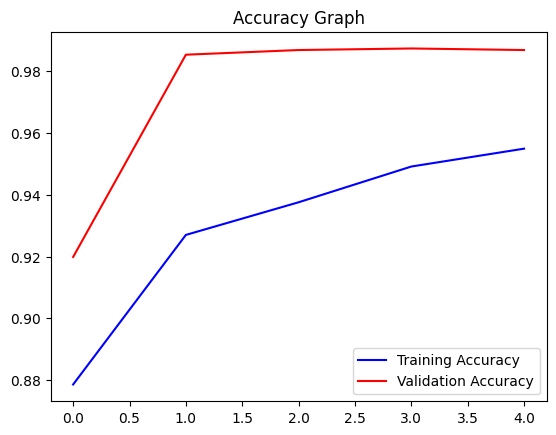

<Figure size 640x480 with 0 Axes>

In [ ]:
# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

### 7.3 Loss graph

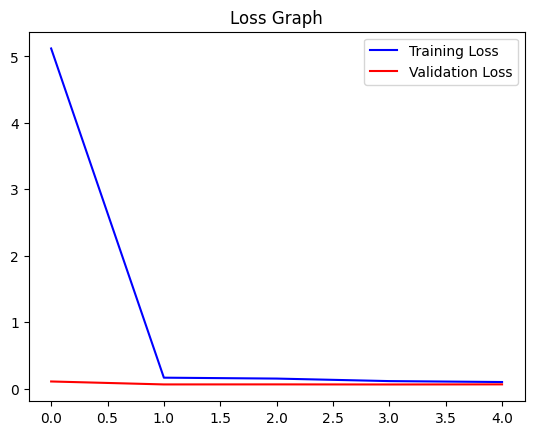

In [ ]:
# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### 7.4 Confusion Matrix

32/32 [==============================] - 10s 239ms/step


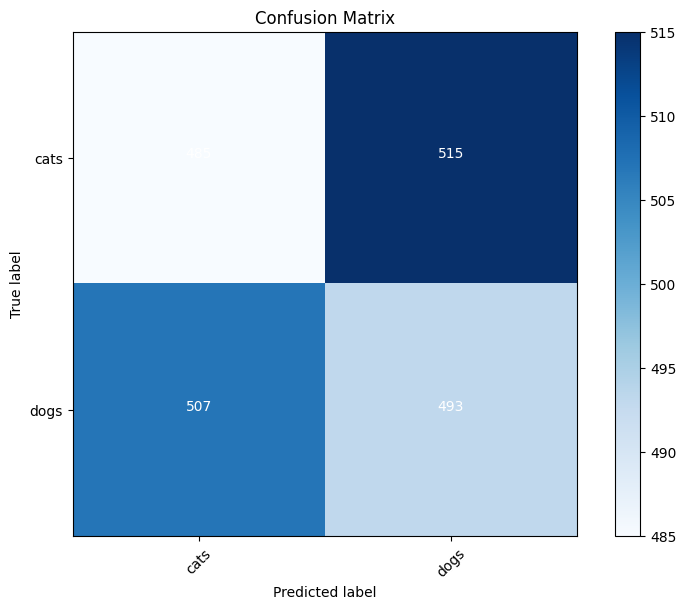

In [ ]:
# Confusion Matrix
import itertools

# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test_generator
true_labels = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names (assuming you have class_names defined)
class_names = test_generator.class_indices.keys()

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title="Confusion Matrix")
plt.show()


### 7.5 Generate predictions for the test data

32/32 [==============================] - 8s 249ms/step


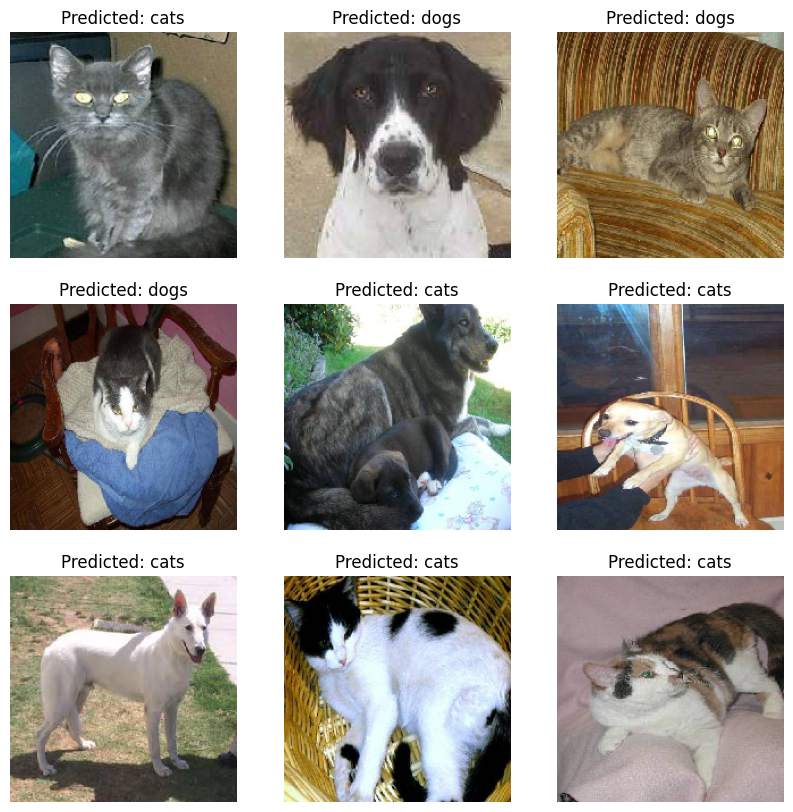

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [ ]:
# Generate predictions for the test data
predictions = model.predict(test_generator)

# Retrieve true labels from the generator (assuming class_mode is 'categorical')
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(9):
    plt.figure(figsize=(6, 6))

    # Plot the image
    ax = axes[i // 3, i % 3]
    image = test_generator[i][0][0]  # Change [0][0] depending on your generator setup
    ax.imshow(image)

    # True label
    true_label = class_labels[true_labels[i]]

    # Predicted label
    predicted_label = class_labels[np.argmax(predictions[i])]

    ax.set_title(f'Predicted: {predicted_label}')
    ax.axis('off')

plt.show()

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Conclusion
</h1>


# 8. Conclusion
#### I hope this code can help you, if you liked this notebook please  press up votes, thanks ❤
